In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('D:/Data/HousingInventory_EDA.csv')

C:\Users\robin\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (3) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [3]:
df.head()

,RE,mail_city,mail_state,mail_zipcode,subdivision_name,neighborhood,perc_capped,just_value,perc_school_deduction,perc_county_deduction,...,city,zipcode,RE_b,sec_township_range,inv_group,mailing_address,site_address,bldng_proportion,adj_just_value,owner_type
0,000006 0030,JACKSONVILLE,FL,32234,SECTION LAND,417300.2,1.0,228683,-0.1093,-0.2186,...,JACKSONVILLE,32234,000006 0030 1,1 2S 23E,NaN,2503 SUMMERFIELD LN,2503 SUMMERFIELD LN,1.0,228683,PRIMARY RESIDENCE
1,000007 0010,JACKSONVILLE,FL,32257,SECTION LAND,417300.2,0.0,75449,0.0000,0.0000,...,JACKSONVILLE,32234,000007 0010 1,1 2S 23E,NaN,9540 SAN JOSE BLVD,2610 N US 301 HWY,1.0,75449,SECONDARY RESIDENCE
2,000009 0100,BALDWIN,FL,32234,SECTION LAND,417300.2,1.0,193391,-0.3320,-0.4612,...,JACKSONVILLE,32234,000009 0100 1,12 2S 23E,NaN,2495 US 301 HWY N,2495 N US 301 HWY,1.0,193391,PRIMARY RESIDENCE
3,000011 0000,BALDWIN,FL,32234,SECTION LAND,417300.2,0.0,95301,0.0000,0.0000,...,JACKSONVILLE,32234,000011 0000 1,12 2S 23E,NaN,2425 US HWY 301 N,2435 N US 301 HWY,1.0,95301,SECONDARY RESIDENCE
4,000012 0010,JACKSONVILLE,FL,32234,SECTION LAND,417300.2,1.0,121447,-0.3491,-0.5550,...,JACKSONVILLE,32234,000012 0010 1,12 2S 23E,NaN,2204 US HWY 301 N,2204 N US 301 HWY,1.0,121447,PRIMARY RESIDENCE


In [4]:
df.shape

(252717, 87)

In [5]:
df = df.drop(columns=[
    'mail_city', 'mail_state', 'mail_zipcode', 'building', 'actual_yr_built', 'effec_yr_built',
    'owner', 'city', 'RE_b', 'sec_township_range', 'inv_group', 
    'mailing_address', 'site_address', 'owner_type', 'subdivision_name', 'neighborhood',
    'adj_just_value', 'bldng_proportion'
    ])
df.shape

(252717, 69)

In [6]:
hsf = df[['RE','heated_sf']].groupby('RE').sum().reset_index()['heated_sf'].to_list()
len(hsf)
gsf = df[['RE','gross_sf']].groupby('RE').sum().reset_index()['gross_sf'].to_list()
len(hsf)
esf = df[['RE','effec_sf']].groupby('RE').sum().reset_index()['effec_sf'].to_list()
len(hsf)

251301

In [7]:
homes = df[['RE','just_value']].groupby('RE').count().reset_index()['just_value'].to_list()
len(homes)

251301

In [8]:
df.drop(columns=['heated_sf','gross_sf','effec_sf'], inplace=True)

In [9]:
df2 = df.groupby('RE', axis=0).mean()

In [10]:
df.drop_duplicates(subset='RE', inplace=True)
df = df[['RE','type_descr', 'tax_district']]
df = df.merge(df2, on='RE', how='left')
df['heated_sf'] = hsf
df['gross_sf'] = gsf
df['effec_sf'] = esf
df['home_count'] = homes
df['zipcode'] = df.zipcode.astype('int').astype('category')

In [11]:
df = pd.get_dummies(df, columns=['zipcode'], prefix='z')
df = pd.get_dummies(df, columns=['tax_district'], prefix='td')
df = pd.get_dummies(df, columns=['type_descr'], prefix='type')

In [12]:
df.shape

(251301, 147)

In [13]:
df2 = pd.read_csv("D:/Data/HomeSales.csv")
df2.head()

,RE,sale_id,seller,sale_date,price,building,actual_yr_built,heated_sf,age_at_sale,neighborhood,zipcode,address
0,017964 0000,1,NaN,1985-09-20,40500,1,1962,1075,23,412602.26,32210.0,6529 HUGH CT
1,112600 0000,6,NaN,2006-11-30,185000,1,1963,1644,43,214701.26,32277.0,5560 MAXINE DR
2,167759 7350,4,REGIONS MORTGAGE,2002-07-10,274000,1,1999,3186,3,314411.28,32256.0,8714 E HAMPTON LANDING DR
3,140237 0000,2,NaN,1988-07-18,77500,1,1961,1924,27,215801.23,32216.0,1340 GROVE PARK BLVD
4,010427 1020,6,POTEET MATTHEW D STEPHANIE J,2006-03-03,179000,1,1986,1533,20,412602.32,32210.0,7213 MIMOSA GROVE TRL


In [14]:
df2 = df2[['RE', 'sale_id', 'sale_date', 'price', 'age_at_sale']]
df2['sale_date'] = pd.to_datetime(df2['sale_date'])
df2 = df2[df2['sale_date']>='2017']
df2.shape

(49111, 5)

In [15]:
df2 = df2.merge(df,how='left',on='RE')
df2.drop(columns='RE', inplace=True)

In [16]:
df2.head()

,sale_id,sale_date,price,age_at_sale,perc_capped,just_value,perc_school_deduction,perc_county_deduction,lot_sf,class,...,td_USD2B,td_USD3,td_USD4,td_USD5,type_SFR 1 STORY,type_SFR 2 STORY,type_SFR 3 STORY,type_SFR CLASS 2,type_SFR CLASS 3,type_SFR SPLIT-LEVEL
0,3,2018-12-06,222700,1,1.0,196871.0,-0.1784,-0.3054,14895.0,4.0,...,0,0,0,0,1,0,0,0,0,0
1,3,2018-11-30,201000,28,0.0,194662.0,0.0000,0.0000,6958.0,4.0,...,0,0,0,0,1,0,0,0,0,0
2,7,2017-09-19,292000,57,1.0,263120.0,-0.1275,-0.2226,7346.0,3.0,...,0,1,0,0,1,0,0,0,0,0
3,5,2017-06-08,250000,39,1.0,239722.0,-0.1309,-0.2352,10624.0,4.0,...,0,0,0,0,1,0,0,0,0,0
4,4,2017-04-28,580000,17,1.0,602899.0,-0.1632,-0.2047,58704.0,4.0,...,0,0,0,0,0,0,0,1,0,0


In [17]:
import math
df2['class'] = [math.ceil(x) for x in df2['class']]
df2['class'] = df2['class'].astype('category')
df2['quality'] = [math.ceil(x) for x in df2['quality']]
df2['quality'] = df2['quality'].astype('category')

In [18]:
df2.drop(columns=['sale_id', 'parcel_bldng_sf', 'sale_date'], inplace=True)
df2['just_value'] = df2.just_value.astype('int64')
df2['lot_sf'] = df2.lot_sf.astype('int64')
df2['age'] = df2.age.astype('int64')
df2['effec_age'] = df2.effec_age.astype('int64')
df2['building_value'] = df2.building_value.astype('int64')
df2['bldng_count'] = df2.bldng_count.astype('int64')
df2['land_value'] = df2.land_value.astype('int64')
df2['feature_count'] = df2.feature_count.astype('int64')
df2['features_value'] = df2.features_value.astype('int64')
df2['sub_ft_count'] = df2.sub_ft_count.astype('int64')
df2['gross_sf'] = df2.gross_sf.astype('int64')
df2['effec_sf'] = df2.effec_sf.astype('int64')
df2['land_use_count'] = df2.land_use_count.astype('int64')

In [19]:
col_list = pd.Series([x if x[:2] in['d_','z_','td'] else None for x in df2.columns]).dropna().to_list()
col_list2 = pd.Series([x if x[:3]=='ft_' else None for x in df2.columns]).dropna().to_list()
col_list3 = pd.Series([x if x[:4]=='sub_' else None for x in df2.columns]).dropna().to_list()
col_list4 = pd.Series([x if x[:5]=='land_' else None for x in df2.columns]).dropna().to_list()
col_list = col_list + col_list2 + col_list3 + col_list4
col_list.remove('land_value')
col_list.remove('land_use_count')
col_list.remove('sub_ft_count')
for col in col_list:
    df2[col] = df2[col].astype('category')
df2.dropna(inplace=True)
df2.shape

(49111, 147)

In [20]:
import os
import pandas as pd
from datetime import datetime,timedelta
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
#import plotly.graph_objects as go
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.ensemble import ExtraTreesRegressor

In [21]:
dfo = df2.select_dtypes(include=['category'])
print(dfo.shape)

vn = pd.DataFrame(dfo.nunique()).reset_index()
vn.columns = ['VarName', 'LevelsCount']
vn.sort_values(by='LevelsCount', ascending =False)
vn

(49111, 116)


,VarName,LevelsCount
0,class,3
1,quality,6
2,ft_Carport_Al,3
3,ft_Cov_Patio,3
4,ft_Deck_Wd,4
...,...,...
111,td_USD2A,2
112,td_USD2B,2
113,td_USD3,2
114,td_USD4,2


<AxesSubplot:>

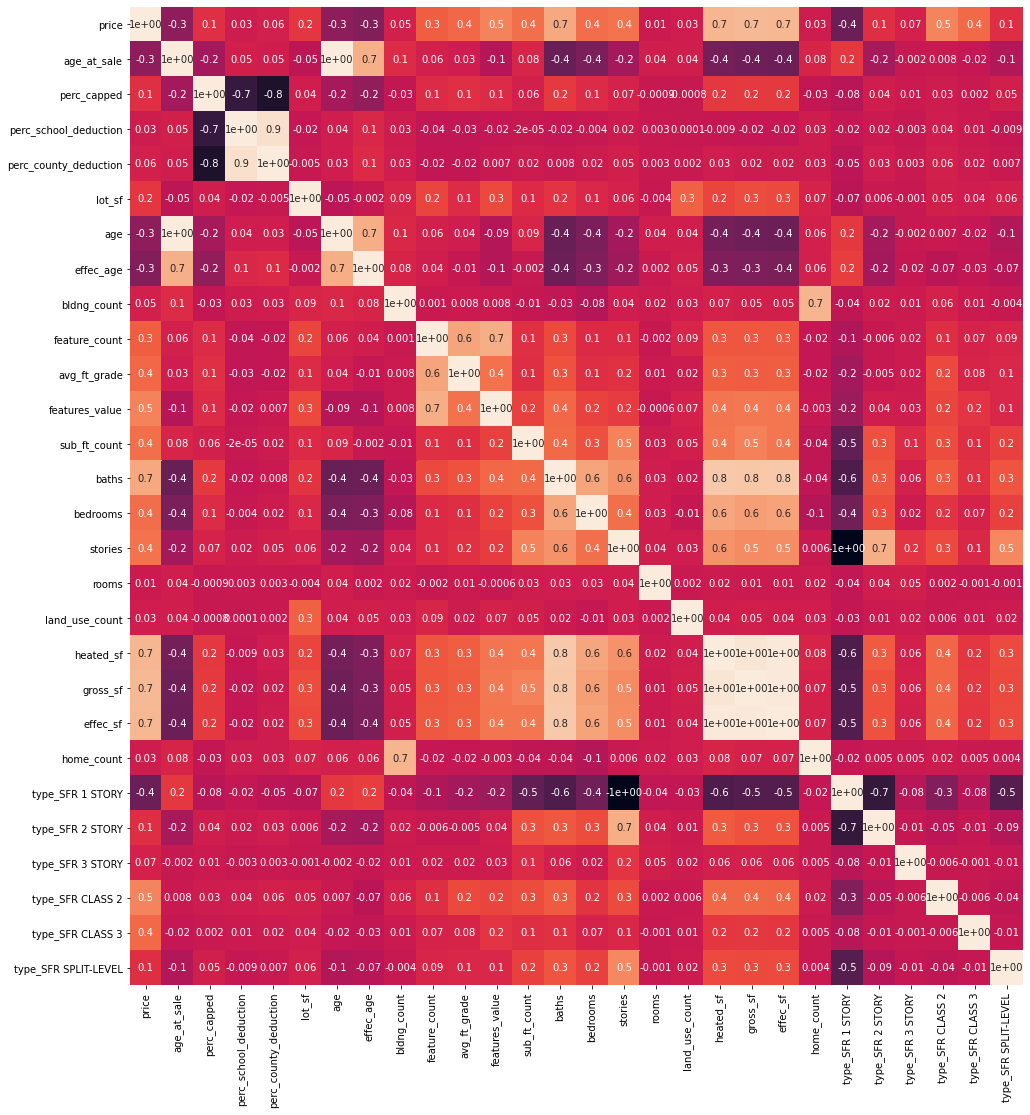

In [22]:
features = df2.columns.to_list()
for f in ['just_value','building_value','land_value']:
    features.remove(f)
fig, ax = plt.subplots(figsize=(16,18))
sns.heatmap(df2[features].corr(),annot=True,cbar=False,fmt='0.00')

In [23]:
df2['p_rank'] = df2.price.rank(pct=True)
df2['starter'] = [1 if x <= 0.33 else 0 for x in df2.p_rank]
df2['starter'] = df2['starter'].astype('category')

In [24]:
features = df2.columns.to_list()
features.remove('price')
features.remove('p_rank')
features.remove('starter')

X = df2[features]

y = df2.starter

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=10)


In [25]:
#scale data
from sklearn import preprocessing
import numpy as np
# build scaler based on training data and apply it to test data to then also scale the test data
scaler = preprocessing.StandardScaler().fit(X_train)
X_train_scaled=scaler.transform(X_train)
X_test_scaled=scaler.transform(X_test)

In [26]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score
from sklearn.metrics import auc
from sklearn.linear_model import LogisticRegression
from matplotlib import pyplot
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score
from sklearn.metrics import auc
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report,confusion_matrix,roc_curve,roc_auc_score
from sklearn.metrics import accuracy_score,log_loss
from matplotlib import pyplot

In [27]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators=300, random_state = 1,n_jobs=-1, max_depth=15)
model_res = clf.fit(X_train_scaled, y_train)
y_pred = model_res.predict(X_test_scaled)
y_pred_prob = model_res.predict_proba(X_test_scaled)
lr_probs = y_pred_prob[:,1]
ac = accuracy_score(y_test, y_pred)

f1 = f1_score(y_test, y_pred, average='weighted')
cm = confusion_matrix(y_test, y_pred)

print('Random Forest: Accuracy=%.3f' % (ac))

print('Random Forest: f1-score=%.3f' % (f1))

Random Forest: Accuracy=0.929
Random Forest: f1-score=0.929


In [28]:
class_names=['Starter Home','Non-Starter Home']

Confusion matrix, without normalization
[[7891  420]
 [ 451 3516]]
Normalized confusion matrix
[[0.95 0.05]
 [0.11 0.89]]


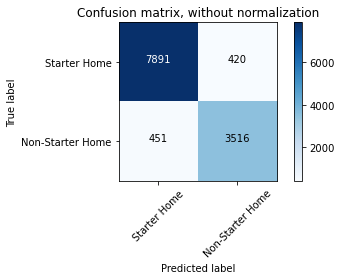

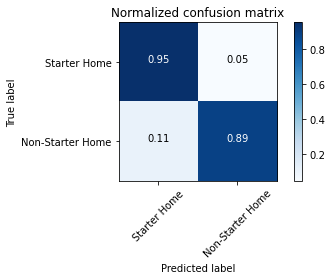

In [29]:
import itertools
import numpy as np
import matplotlib.pyplot as plt

from sklearn import svm, datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()


# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, y_pred)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Confusion matrix, without normalization')
#plt.savefig('figures/RF_cm_multi_class.png')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')
#plt.savefig('figures/RF_cm_proportion_multi_class.png', bbox_inches="tight")
plt.show()

30


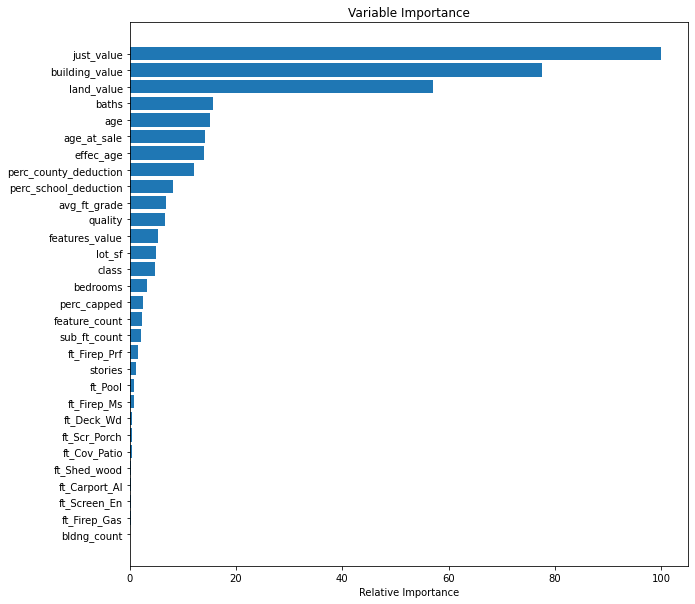

In [30]:
feature_importance = clf.feature_importances_
# make importances relative to max importance
feature_importance = 100.0 * (feature_importance / feature_importance.max())[:30]
sorted_idx = np.argsort(feature_importance)[:30]

pos = np.arange(sorted_idx.shape[0]) + .5
print(pos.size)
sorted_idx.size
plt.figure(figsize=(10,10))
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, X.columns[sorted_idx])
plt.xlabel('Relative Importance')
plt.title('Variable Importance')
plt.show()

In [31]:
df3 = df2[X.columns[sorted_idx[21:30]].to_list()]
df3['starter'] = df2['starter']

<ipython-input-31-9840f2993ee4>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['starter'] = df2['starter']


In [32]:
df3.shape

(49111, 10)

In [33]:
X = df3.drop(columns='starter')

y = df3.starter

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=10)

In [34]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import RandomizedSearchCV
param_grid = {'n_neighbors':np.arange(1,50)}
knn = KNeighborsClassifier()
knn_cv= RandomizedSearchCV(knn,param_grid,cv=5)
knn_cv.fit(X,y)


RandomizedSearchCV(cv=5, estimator=KNeighborsClassifier(),
                   param_distributions={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49])})

In [35]:
y_pred = knn_cv.predict(X_test)

In [36]:
print("Best Score:" + str(knn_cv.best_score_))
print("Best Parameters: " + str(knn_cv.best_params_))

Best Score:0.9175341603809543
Best Parameters: {'n_neighbors': 26}


Confusion matrix, without normalization
[[7896  415]
 [ 473 3494]]
Normalized confusion matrix
[[0.95 0.05]
 [0.12 0.88]]


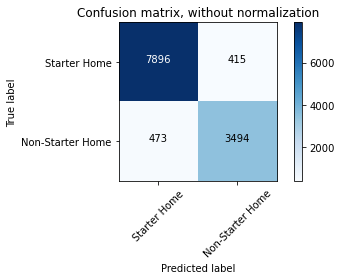

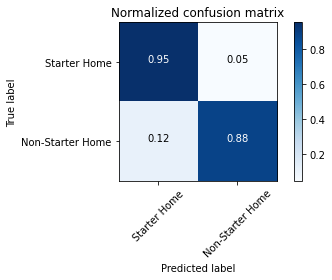

In [37]:
knn = KNeighborsClassifier(n_neighbors=28)
knn.fit(X,y)
y_pred = knn.predict(X_test)

cnf_matrix = confusion_matrix(y_test, y_pred)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Confusion matrix, without normalization')
#plt.savefig('figures/RF_cm_multi_class.png')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')
#plt.savefig('figures/RF_cm_proportion_multi_class.png', bbox_inches="tight")
plt.show()

In [38]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.94      0.95      0.95      8311
           1       0.89      0.88      0.89      3967

    accuracy                           0.93     12278
   macro avg       0.92      0.92      0.92     12278
weighted avg       0.93      0.93      0.93     12278

